In [1]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Dataset

In [2]:
#Let's bring the full dataset

df = pd.read_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\Geochem_till_Ch3_multivariate.csv')

In [3]:
df.head()

,Sample_ID,Oxidation,X,Y,Year,Type,Depth_m,Grain_size_group,Distance_to_pit_m,Underlying Bedrock,...,Nd_ppm,PbSUM_ppm,Pr_ppm,Rb_ppm,Sc_ppm,Sm_ppm,Tb_ppm,W_ppm,Y_ppm,Yb_ppm
0,001a,Slight,712587,5331728,2016,Surface,0.35,Medium,2725.103005,Meta-sedimentary,...,23.1,10.20,5.7,38.3,14.6,4.2,0.52,1.0,14.5,1.52
1,004a,Slight,706551,5333381,2016,Surface,0.10,Medium,6689.690932,Meta-sedimentary,...,23.4,11.80,6.0,40.8,14.2,4.3,0.55,1.4,15.0,1.55
2,005a,Slight,706274,5325153,2016,Surface,0.30,Fine,11605.950470,Meta-sedimentary,...,25.4,13.20,6.5,41.4,13.5,4.4,0.52,1.0,13.7,1.40
3,007a,Slight,716966,5323165,2016,Surface,0.40,Medium,10492.123050,Meta-sedimentary,...,24.0,24.30,6.2,51.9,11.8,4.3,0.51,1.4,13.0,1.52
4,009a,Slight,718028,5338822,2016,Surface,0.20,Medium,4322.272920,Mafic/Ultramafic,...,19.8,8.31,4.9,40.2,14.8,3.9,0.52,0.8,14.6,1.51


In [4]:
#Summary stats
df.describe()

#need to add Au and Bi values!!!

,X,Y,Year,Depth_m,Distance_to_pit_m,Ba_ppm,Ce_ppm,La_ppm,Sr_ppm,Au_ppb,...,Nd_ppm,PbSUM_ppm,Pr_ppm,Rb_ppm,Sc_ppm,Sm_ppm,Tb_ppm,W_ppm,Y_ppm,Yb_ppm
count,72.000000,7.200000e+01,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000,72.00000,72.000000,72.000000,72.000000
mean,711857.722222,5.332642e+06,2015.569444,1.222083,4991.300484,418.819444,37.180556,16.708333,433.208333,11.513889,...,20.788889,13.324444,5.254167,41.545833,13.284722,3.73750,0.43500,1.201389,12.486111,1.230694
std,4329.325238,4.244458e+03,0.498629,2.418926,3022.213414,74.441077,13.110931,6.787390,66.371540,32.468400,...,7.032892,4.299775,1.742262,10.089207,2.320008,1.15166,0.10769,0.841610,2.710715,0.225247
min,702408.000000,5.321503e+06,2015.000000,0.100000,312.660069,213.000000,9.000000,4.000000,182.000000,0.000000,...,5.700000,8.030000,1.600000,20.900000,7.600000,1.00000,0.15000,0.400000,5.400000,0.750000
25%,708270.500000,5.330664e+06,2015.000000,0.350000,2722.511207,370.750000,29.000000,13.000000,402.750000,0.000000,...,16.875000,10.600000,4.275000,35.975000,11.800000,3.10000,0.37750,0.700000,11.175000,1.087500
50%,712156.000000,5.332822e+06,2016.000000,0.400000,4262.976345,414.000000,36.000000,16.000000,443.000000,2.500000,...,20.050000,11.900000,5.000000,39.500000,13.150000,3.75000,0.43500,1.000000,12.550000,1.225000
75%,714292.750000,5.335060e+06,2016.000000,0.662500,6734.113879,452.000000,43.000000,20.000000,473.750000,15.000000,...,23.850000,14.825000,6.050000,45.625000,14.275000,4.30000,0.51000,1.400000,13.775000,1.345000
max,721020.000000,5.344935e+06,2016.000000,13.100000,14792.600670,727.000000,82.000000,45.000000,582.000000,267.000000,...,54.000000,29.300000,13.000000,81.400000,23.900000,9.30000,0.88000,5.600000,25.200000,2.260000


In [5]:
#variance
print("Variance: ")
df.var()

#need to add Au and Bi values!!!

Variance: 


X                    1.874306e+07
Y                    1.801542e+07
Year                 2.486307e-01
Depth_m              5.851203e+00
Distance_to_pit_m    9.133774e+06
Ba_ppm               5.541474e+03
Ce_ppm               1.718965e+02
La_ppm               4.606866e+01
Sr_ppm               4.405181e+03
Au_ppb               1.054197e+03
Ag_ppm               5.298279e-03
Bi_ppm               2.209507e-02
Cs_ppm               1.126242e+00
Dy_ppm               3.803976e-01
Er_ppm               8.116039e-02
Eu_ppm               7.533020e-02
Ga_ppm               8.660493e+00
Ho_ppm               1.190280e-02
Mo_ppm               2.394018e+00
Nd_ppm               4.946156e+01
PbSUM_ppm            1.848806e+01
Pr_ppm               3.035475e+00
Rb_ppm               1.017921e+02
Sc_ppm               5.382439e+00
Sm_ppm               1.326320e+00
Tb_ppm               1.159718e-02
W_ppm                7.083079e-01
Y_ppm                7.347973e+00
Yb_ppm               5.073613e-02
dtype: float64

In [6]:
#skew
print("Skew: ")
df.skew()

#need to add Au and Bi values!!!

Skew: 


X                    0.137555
Y                   -0.187952
Year                -0.286500
Depth_m              3.690282
Distance_to_pit_m    0.930638
Ba_ppm               0.776781
Ce_ppm               0.679193
La_ppm               1.387916
Sr_ppm              -0.845472
Au_ppb               7.086963
Ag_ppm               1.649893
Bi_ppm               1.093688
Cs_ppm               2.388162
Dy_ppm               0.769695
Er_ppm               0.903320
Eu_ppm               2.196764
Ga_ppm               2.120972
Ho_ppm               0.852252
Mo_ppm               2.919960
Nd_ppm               1.620904
PbSUM_ppm            1.732930
Pr_ppm               1.411489
Rb_ppm               1.716412
Sc_ppm               1.402519
Sm_ppm               1.480011
Tb_ppm               0.599033
W_ppm                3.122461
Y_ppm                0.945984
Yb_ppm               1.162009
dtype: float64

In [7]:
#kurtosis
print("Kurtosis: ")
df.kurt()

#need to add Au and Bi values!!!

Kurtosis: 


X                    -0.573718
Y                     0.608742
Year                 -1.973543
Depth_m              13.826303
Distance_to_pit_m     0.636427
Ba_ppm                4.137747
Ce_ppm                1.536112
La_ppm                4.261530
Sr_ppm                2.431900
Au_ppb               55.689609
Ag_ppm                3.376726
Bi_ppm                2.737074
Cs_ppm                9.272853
Dy_ppm                4.397317
Er_ppm                5.344083
Eu_ppm               11.800492
Ga_ppm                6.915360
Ho_ppm                4.721512
Mo_ppm               10.636857
Nd_ppm                6.600520
PbSUM_ppm             3.314128
Pr_ppm                5.005292
Rb_ppm                5.443326
Sc_ppm                6.144997
Sm_ppm                7.041094
Tb_ppm                3.355744
W_ppm                12.671871
Y_ppm                 6.272319
Yb_ppm                5.171660
dtype: float64

In [8]:
# Need to add additional stat calculations to dataframe
df1 = pd.concat([df.var(), df.skew(), df.kurt()], axis=1)

df1.columns = ["Variance", "Skew", "Kurtosis"]

df1.head()

,Variance,Skew,Kurtosis
X,1.874306e+07,0.137555,-0.573718
Y,1.801542e+07,-0.187952,0.608742
Year,2.486307e-01,-0.286500,-1.973543
Depth_m,5.851203e+00,3.690282,13.826303
Distance_to_pit_m,9.133774e+06,0.930638,0.636427


In [9]:
#Sort by variance to choose top 8 variables for PCA
#print("Sorted variance: ")
#df1 = df1.sort_values("Variance", ascending=False)
#df1

In [10]:
df1.transpose()

,X,Y,Year,Depth_m,Distance_to_pit_m,Ba_ppm,Ce_ppm,La_ppm,Sr_ppm,Au_ppb,...,Nd_ppm,PbSUM_ppm,Pr_ppm,Rb_ppm,Sc_ppm,Sm_ppm,Tb_ppm,W_ppm,Y_ppm,Yb_ppm
Variance,1.874306e+07,1.801542e+07,0.248631,5.851203,9.133774e+06,5541.473983,171.896518,46.068662,4405.181338,1054.196987,...,49.461565,18.488062,3.035475,101.792095,5.382439,1.326320,0.011597,0.708308,7.347973,0.050736
Skew,1.375547e-01,-1.879523e-01,-0.286500,3.690282,9.306376e-01,0.776781,0.679193,1.387916,-0.845472,7.086963,...,1.620904,1.732930,1.411489,1.716412,1.402519,1.480011,0.599033,3.122461,0.945984,1.162009
Kurtosis,-5.737176e-01,6.087419e-01,-1.973543,13.826303,6.364275e-01,4.137747,1.536112,4.261530,2.431900,55.689609,...,6.600520,3.314128,5.005292,5.443326,6.144997,7.041094,3.355744,12.671871,6.272319,5.171660


In [11]:
#Extracting feature to have just 8 features/variables
#Au, Ba, Cd, Pb, As, Sb, Bi, Mo, Ag, W, Te

Sub_df=df[['Ag_ppm', 'Ba_ppm', 'Cs_ppm', 'Mo_ppm','PbSUM_ppm', 'Rb_ppm', 'Sr_ppm', 'W_ppm']].copy()   
Sub_df=Sub_df.dropna()

Sub_df

,Ag_ppm,Ba_ppm,Cs_ppm,Mo_ppm,PbSUM_ppm,Rb_ppm,Sr_ppm,W_ppm
0,0.18,402,1.7,0.45,10.20,38.3,483,1.0
1,0.31,381,2.0,0.81,11.80,40.8,454,1.4
2,0.19,379,2.5,1.00,13.20,41.4,445,1.0
3,0.37,527,4.7,2.26,24.30,51.9,553,1.4
4,0.20,361,1.8,0.42,8.31,40.2,416,0.8
...,...,...,...,...,...,...,...,...
67,0.15,446,1.8,1.49,12.80,39.2,487,0.6
68,0.13,443,1.4,0.42,10.30,37.0,490,0.5
69,0.12,496,1.6,0.56,10.20,42.9,452,0.8
70,0.12,371,1.4,0.60,11.30,32.2,480,0.8


In [12]:
#Make a numpy array for easier matrix calculation

arr=Sub_df.to_numpy()    
arr

array([[1.80e-01, 4.02e+02, 1.70e+00, 4.50e-01, 1.02e+01, 3.83e+01,
        4.83e+02, 1.00e+00],
       [3.10e-01, 3.81e+02, 2.00e+00, 8.10e-01, 1.18e+01, 4.08e+01,
        4.54e+02, 1.40e+00],
       [1.90e-01, 3.79e+02, 2.50e+00, 1.00e+00, 1.32e+01, 4.14e+01,
        4.45e+02, 1.00e+00],
       [3.70e-01, 5.27e+02, 4.70e+00, 2.26e+00, 2.43e+01, 5.19e+01,
        5.53e+02, 1.40e+00],
       [2.00e-01, 3.61e+02, 1.80e+00, 4.20e-01, 8.31e+00, 4.02e+01,
        4.16e+02, 8.00e-01],
       [1.40e-01, 3.54e+02, 1.50e+00, 6.10e-01, 1.07e+01, 3.51e+01,
        4.41e+02, 1.00e+00],
       [1.50e-01, 3.49e+02, 1.30e+00, 5.20e-01, 1.11e+01, 3.10e+01,
        4.71e+02, 9.00e-01],
       [2.30e-01, 4.52e+02, 2.30e+00, 1.38e+00, 1.20e+01, 3.86e+01,
        4.76e+02, 1.40e+00],
       [3.00e-01, 4.78e+02, 7.90e+00, 1.71e+00, 1.87e+01, 8.14e+01,
        3.41e+02, 1.00e+00],
       [1.60e-01, 4.04e+02, 3.00e+00, 7.70e-01, 1.16e+01, 4.63e+01,
        3.92e+02, 9.00e-01],
       [2.40e-01, 4.74e+02, 3.

In [13]:
#Get the number of elements in the array

arr.shape

(72, 8)

# CLR Transformation step

In [14]:
#Get the geometric mean of each row

arr_2=gmean(arr, axis=1)
arr_2

array([ 7.5398596 ,  9.35278536,  9.01900002, 14.56232366,  7.04504341,
        7.2353615 ,  6.90401035, 10.02298526, 13.34440127,  8.54004404,
       10.06419072, 13.71686662,  9.74635547,  9.01790636,  8.69110192,
       10.89059666, 10.23983645,  8.48917382, 10.52042666, 10.57986028,
        7.41672728,  7.435281  ,  9.59600983,  9.65927687, 14.5867948 ,
       10.03691868,  7.26485973,  8.58882848, 10.79568306,  6.93954729,
        9.38740154,  7.66855406, 10.51378675,  7.72033174, 11.92469759,
       10.05695474, 12.2526687 ,  7.69764723,  7.57729909,  8.62987974,
       12.99642289,  7.38403456,  9.0152948 , 20.46352453,  8.55890279,
        8.49341888,  8.595536  ,  8.78341327, 12.00143703, 13.53438493,
        8.86658662, 10.88327681,  9.00954967, 11.74912158, 11.25734416,
        7.69843948,  7.97589639,  7.14927422,  9.61077034,  9.25158851,
        6.72337998,  6.38964916,  9.56686563,  7.07194008,  7.51077997,
        6.1888103 ,  7.0969926 ,  8.46267461,  6.49368443,  7.34

In [15]:
arr_2.shape

(72,)

In [16]:
#Transpose array

arrT=arr.T               
arrT

array([[1.80e-01, 3.10e-01, 1.90e-01, 3.70e-01, 2.00e-01, 1.40e-01,
        1.50e-01, 2.30e-01, 3.00e-01, 1.60e-01, 2.40e-01, 2.60e-01,
        1.80e-01, 1.50e-01, 1.80e-01, 2.50e-01, 1.60e-01, 2.00e-01,
        2.10e-01, 1.90e-01, 1.50e-01, 1.50e-01, 1.70e-01, 1.90e-01,
        3.00e-01, 2.10e-01, 2.30e-01, 3.00e-01, 2.40e-01, 1.70e-01,
        2.10e-01, 1.60e-01, 2.00e-01, 1.50e-01, 2.30e-01, 2.10e-01,
        4.70e-01, 1.50e-01, 1.90e-01, 2.10e-01, 4.30e-01, 1.60e-01,
        1.70e-01, 3.70e-01, 1.70e-01, 1.60e-01, 2.20e-01, 1.90e-01,
        2.70e-01, 2.50e-01, 2.00e-01, 2.10e-01, 1.70e-01, 1.90e-01,
        1.60e-01, 1.00e-01, 1.30e-01, 1.10e-01, 1.20e-01, 1.60e-01,
        1.30e-01, 1.20e-01, 1.40e-01, 1.20e-01, 1.40e-01, 1.10e-01,
        1.40e-01, 1.50e-01, 1.30e-01, 1.20e-01, 1.20e-01, 1.00e-01],
       [4.02e+02, 3.81e+02, 3.79e+02, 5.27e+02, 3.61e+02, 3.54e+02,
        3.49e+02, 4.52e+02, 4.78e+02, 4.04e+02, 4.74e+02, 4.05e+02,
        3.51e+02, 3.48e+02, 3.70e+02, 3.69e+02,

In [17]:
arrT.shape

(8, 72)

In [18]:
#Apply the centered log-ratio transform

arr_clr=np.log(arrT/arr_2)
arr_clr

array([[-3.73500199, -3.40685718, -3.86006467, -3.6726899 , -3.56176222,
        -3.94509318, -3.82922244, -3.77455695, -3.79506972, -3.97734763,
        -3.73610001, -3.96569986, -3.99169185, -4.09633218, -3.87709816,
        -3.77419409, -4.15886711, -3.7482296 , -3.91396651, -4.01968343,
        -3.90085788, -3.90335636, -4.03330421, -3.92864999, -3.88408946,
        -3.86691791, -3.45272496, -3.35443515, -3.80626269, -3.70919338,
        -3.80001628, -3.86970954, -3.96212533, -3.94097732, -3.94828765,
        -3.86891216, -3.26076635, -3.93803471, -3.68588802, -3.71587832,
        -3.40864423, -3.83190164, -3.9708794 , -4.01289628, -3.91892884,
        -3.97187308, -3.66537073, -3.83359629, -3.79435972, -3.99152784,
        -3.79172781, -3.94787512, -3.97024193, -4.12450969, -4.25360219,
        -4.34360274, -4.11664487, -4.17428576, -4.38314792, -4.05737673,
        -3.94581183, -3.9749429 , -4.22441849, -4.07639839, -3.98245217,
        -4.03001778, -3.92578397, -4.03278526, -3.9

In [19]:
#Transpose again to get back to the original array shape

arr_clrT=arr_clr.T  
arr_clrT

array([[-3.73500199,  3.97624853, -1.48957531, -2.81871126,  0.30218416,
         1.62524634,  4.15981309, -2.02020356],
       [-3.40685718,  3.70712518, -1.54252702, -2.44639523,  0.23242533,
         1.47300788,  3.882423  , -1.89920196],
       [-3.86006467,  3.73820274, -1.28304273, -2.19933347,  0.38088336,
         1.52394742,  3.89874082, -2.19933347],
       [-3.6726899 ,  3.58876293, -1.13087511, -1.86307281,  0.51203873,
         1.27088117,  3.63692038, -2.34196539],
       [-3.56176222,  3.93655365, -1.36453764, -2.81982487,  0.1651353 ,
         1.74154269,  4.07836095, -2.17546786],
       [-3.94509318,  3.89031659, -1.57351522, -2.47327665,  0.39126342,
         1.57922081,  4.11006455, -1.97898032],
       [-3.82922244,  3.92296947, -1.66973819, -2.58602892,  0.47484266,
         1.50188475,  4.22275564, -2.03746297],
       [-3.77455695,  3.8088012 , -1.47197186, -1.98279748,  0.18002567,
         1.3483713 ,  3.86053687, -1.96840874],
       [-3.79506972,  3.57851382

In [20]:
arr_clrT.shape

(72, 8)

# Standardization (scaling) of the CLR dataset (mean=0, var=1) 

In [21]:
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

# Standardizing the data
#by default is from 0 to 1. Example of custom range: MinMaxScaler(feature_range=(-1,1))
X = MinMaxScaler().fit_transform(arr_clrT)   

print(X)

[[0.57747378 0.70634852 0.25314521 0.0514778  0.56935458 0.74385884
  0.86877499 0.5513329 ]
 [0.86983853 0.42685332 0.2121781  0.22142306 0.51889603 0.58269439
  0.64649834 0.61002109]
 [0.46604761 0.45912859 0.41293312 0.33419547 0.62627996 0.63662059
  0.65957404 0.46445132]
 [0.63299153 0.30392945 0.53066053 0.48768309 0.72114838 0.36871663
  0.44977357 0.395272  ]
 [0.73182394 0.66512383 0.34988301 0.05096949 0.47022323 0.86697385
  0.80350622 0.47602662]
 [0.39029039 0.61710482 0.18820349 0.20915292 0.63378815 0.69513476
  0.82891077 0.57132699]
 [0.49352689 0.65101612 0.11375873 0.15768666 0.6942434  0.61326436
  0.91921175 0.54296174]
 [0.54223179 0.53244787 0.26676446 0.43303425 0.48099385 0.45075014
  0.62896067 0.57645442]
 [0.52395568 0.29328535 1.         0.40025806 0.59484645 0.93762235
  0.13234507 0.27443823]
 [0.36155288 0.5821394  0.59620675 0.23980187 0.57228751 0.81280696
  0.60168297 0.4398156 ]
 [0.57649549 0.57754382 0.58841837 0.10810786 0.44092437 0.96164595
  

In [22]:
#Make a dataframe

SD_data = pd.DataFrame(X, columns=['Ag_ppm', 'Ba_ppm', 'Cs_ppm', 'Mo_ppm','PbSUM_ppm', 'Rb_ppm', 'Sr_ppm', 'W_ppm'])  
SD_data.head()

,Ag_ppm,Ba_ppm,Cs_ppm,Mo_ppm,PbSUM_ppm,Rb_ppm,Sr_ppm,W_ppm
0,0.577474,0.706349,0.253145,0.051478,0.569355,0.743859,0.868775,0.551333
1,0.869839,0.426853,0.212178,0.221423,0.518896,0.582694,0.646498,0.610021
2,0.466048,0.459129,0.412933,0.334195,0.626280,0.636621,0.659574,0.464451
3,0.632992,0.303929,0.530661,0.487683,0.721148,0.368717,0.449774,0.395272
4,0.731824,0.665124,0.349883,0.050969,0.470223,0.866974,0.803506,0.476027


In [23]:
#Export dataframe as .csv file

#SD_data.to_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\SD_data_trace_elements_index.csv')   

# Kmeans clustering

In [24]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [25]:
#This generates a 8X4 array (one centroid per element per cluster (8 elements; 4 clusters)

print(kmeans.cluster_centers_) 

[[0.50380549 0.43941951 0.47357119 0.3825801  0.56008313 0.59868438
  0.52334707 0.50789803]
 [0.34934702 0.75790129 0.25844528 0.20043163 0.60884925 0.73702772
  0.82955327 0.49023263]
 [0.47082833 0.1840517  0.24975356 0.76425224 0.59357505 0.25487798
  0.33297776 0.6301543 ]
 [0.4160474  0.6485396  0.17339832 0.61704529 0.67119054 0.71349651
  0.67112106 0.18050201]]


In [26]:
print(kmeans.labels_)

[1 0 0 0 1 1 1 0 0 0 0 2 2 0 0 2 0 0 0 2 1 3 0 0 2 0 2 0 0 1 0 1 0 1 2 2 0
 2 1 0 2 3 3 2 3 3 3 0 3 2 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1]


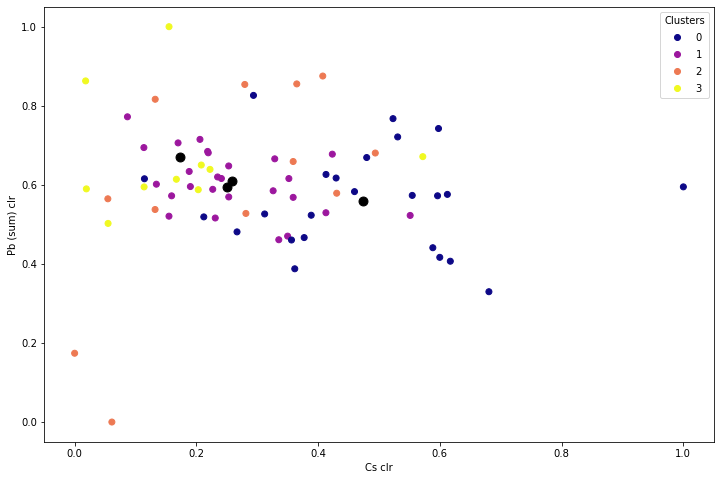

In [27]:
#plotting results using Ce and Rb clr data

fig, ax = plt.subplots(figsize=(12,8))

scatter=ax.scatter(X[:,2], X[:,4], c=kmeans.labels_, cmap='plasma')
ax.scatter(kmeans.cluster_centers_[:,2] ,kmeans.cluster_centers_[:,4], color='black', s=80)
ax.set_xlabel('Cs clr')
ax.set_ylabel('Pb (sum) clr')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [28]:
#Running K means with multiple Ks

no_of_clusters=range(2,20) #[2,3,4,5...]
inertia=[]    #Creates an empty list

for f in no_of_clusters:
    kmeans=KMeans(n_clusters=f, random_state=2)
    kmeans=kmeans.fit(X)
    u=kmeans.inertia_
    inertia.append(u)   #This will populate the inertia list with u
    print("The inertia for :", f, "clusters is:", u)

The inertia for : 2 clusters is: 17.01438177255687
The inertia for : 3 clusters is: 14.1618533015058
The inertia for : 4 clusters is: 12.307803386750333
The inertia for : 5 clusters is: 11.112331756158135
The inertia for : 6 clusters is: 9.903411948410225
The inertia for : 7 clusters is: 9.209846688249684
The inertia for : 8 clusters is: 8.158530131461749
The inertia for : 9 clusters is: 7.555670025337952
The inertia for : 10 clusters is: 7.013202279151946
The inertia for : 11 clusters is: 6.622945455156292
The inertia for : 12 clusters is: 6.210524505259769
The inertia for : 13 clusters is: 5.710455675628189
The inertia for : 14 clusters is: 5.6042888381021765
The inertia for : 15 clusters is: 4.976599122574685
The inertia for : 16 clusters is: 4.914180777904547
The inertia for : 17 clusters is: 4.542774371406128
The inertia for : 18 clusters is: 4.196403658422311
The inertia for : 19 clusters is: 4.034403601905722


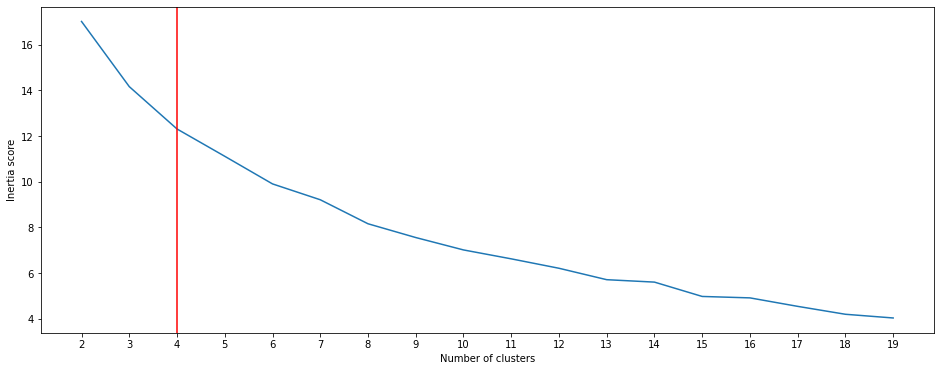

In [29]:
#Making a scree plot of intertia scores

fig, (ax1)=plt.subplots(1, figsize=(16,6))
xx=np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')

plt.axvline(2, color='red')   #plot the previous choice of number of clusters

In [30]:
print("The inertia is:", kmeans.inertia_)

The inertia is: 4.034403601905722


In [31]:
#Running K means on 4 clusters again

kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(X)


clusters=kmeans.predict(X)   #normally used for new data, but here it will be applied to the existing data 

#calculating the counts of the clusters
unique, counts=np.unique(kmeans.labels_, return_counts=True)
counts=counts.reshape(1,4) #one row and four columns

#Creating a dataframe
countscldf=pd.DataFrame(counts, columns=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3'])

#display
countscldf

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,25,17,10,20


In [32]:
print(kmeans.labels_)   

[0 3 3 1 0 0 0 3 3 3 3 1 1 1 3 1 3 3 1 1 0 2 3 3 1 3 1 3 3 0 1 0 3 0 1 1 3
 1 3 1 1 2 2 1 2 2 2 3 2 1 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]


# PCA Analysis

In [33]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Explained variance (first two components): [0.48862626 0.18215556]


<Figure size 432x288 with 0 Axes>

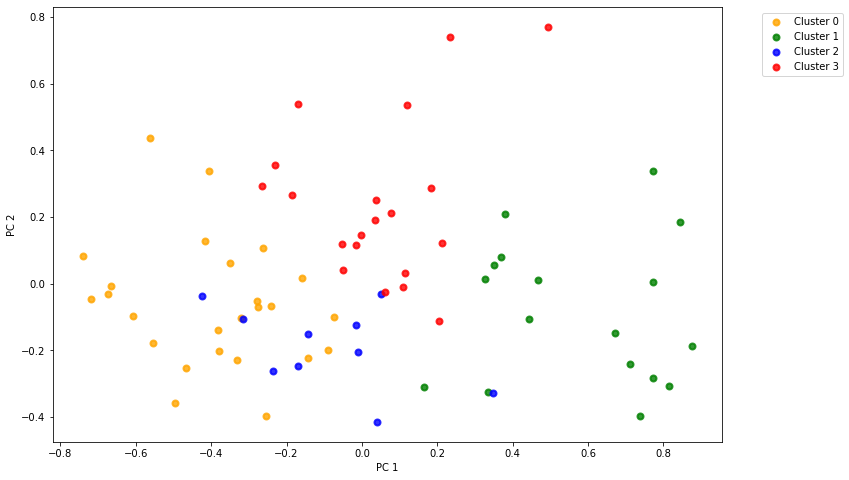

In [34]:
X = X
y_num = clusters    #Clusters are the kmeans labels

target_names = ['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3']

pca=PCA(n_components=2)    #To visualize the first two components. Option to scale to Unit variance (whiten=True)
X_r=pca.fit(X).transform(X)

#Percentage of variance explained for each component
print('Explained variance (first two components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['orange', 'green', 'blue', 'red']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.6)  #This is just to put the legend outside the plot
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


In [35]:
print(X_r)   #PC 1 and PC 2 scores

[[-0.41712861  0.12797926]
 [ 0.03735435  0.25147895]
 [-0.01577073  0.11484448]
 [ 0.3794852   0.20826156]
 [-0.40557209  0.33789568]
 [-0.27591959 -0.06865721]
 [-0.32176496 -0.10246289]
 [ 0.10938966 -0.0085334 ]
 [ 0.23356646  0.7409394 ]
 [-0.18539783  0.26630552]
 [-0.16985461  0.5398397 ]
 [ 0.81500193 -0.30807769]
 [ 0.33572973 -0.32473142]
 [ 0.16437212 -0.30838625]
 [-0.0019816   0.14666812]
 [ 0.44238442 -0.10546053]
 [ 0.06088823 -0.02531162]
 [-0.23083294  0.35614284]
 [ 0.32716213  0.01369775]
 [ 0.67061301 -0.14633037]
 [-0.262087    0.10832098]
 [-0.14415795 -0.15001005]
 [ 0.11568565  0.03203344]
 [ 0.21184455  0.12309948]
 [ 0.77187388  0.00623541]
 [ 0.18461485  0.28643028]
 [ 0.84414189  0.18448362]
 [ 0.12087801  0.53482908]
 [-0.04941245  0.04253035]
 [-0.56244606  0.43569048]
 [ 0.3516462   0.05630544]
 [-0.15786698  0.01700653]
 [ 0.07684011  0.21138064]
 [-0.24118485 -0.06565558]
 [ 0.73812604 -0.3970696 ]
 [ 0.46660275  0.01076485]
 [ 0.49382492  0.77098339]
 

In [36]:
n_components = X.shape[1]

#Running PCA on all components
pca=PCA(n_components=n_components)
X_r=pca.fit(X).transform(X)

#calculating the 95% variance
total_variance = sum(pca.explained_variance_)
print('Total variance in the dataset is:', total_variance)
var_95 = total_variance*0.95
print('The 95% variance is: ', var_95)
print('')

#Creating a df with the components and explained variance
a = zip(range(0,n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=['PCA Comp', 'Explained Variance'])

#Trying to find 95%... we already know in this case that the first 2 already achieve abut 90%, so let's see
print('Variance explain with 2 n_components:', sum(a['Explained Variance'][0:2]))
print('Variance explain with 3 n_components:', sum(a['Explained Variance'][0:3]))
print('Variance explain with 4 n_components:', sum(a['Explained Variance'][0:4]))
print('Variance explain with 5 n_components:', sum(a['Explained Variance'][0:5]))


Total variance in the dataset is: 0.3588582326104738
The 95% variance is:  0.3409153209799501

Variance explain with 2 n_components: 0.24071558070497134
Variance explain with 3 n_components: 0.29237011224334725
Variance explain with 4 n_components: 0.31939936696726534
Variance explain with 5 n_components: 0.34549238173288505


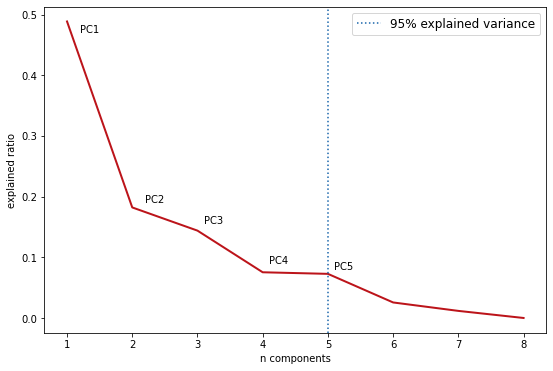

In [37]:
#Plotting the data
plt.figure(1, figsize=(9,6))
plt.plot(pca.explained_variance_ratio_, linewidth=2, c='#bc141a')
plt.xlabel('n components')
plt.ylabel('explained ratio')

#Change x-axis ticks so that they start from 1
plt.xticks([0,1,2,3,4,5,6,7], ['1', '2', '3', '4', '5', '6', '7', '8'])

#Plotting line with 95% e.v.
plt.axvline(4,linestyle=':', label='95% explained variance', c='#1764ab') 
plt.legend(prop=dict(size=12))
plt.text(0.2, 0.47, 'PC1')        #index starts at 0 and it is PC1
plt.text(1.2, 0.19, 'PC2')
plt.text(2.1, 0.155, 'PC3')
plt.text(3.1, 0.09, 'PC4')
plt.text(4.1, 0.08, 'PC5')
plt.show()

In [38]:
# Running PCA again, this time with 4 components (because going from 4 to 5 shows no difference)

pca=PCA(n_components=4)
X_r=pca.fit(X).transform(X)

inertia=[]

#Running kmeans after PCA to help improve the kmeans clustering

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f)
    kmeans = kmeans.fit(X_r)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for :', f, 'clusters is', u)
    


The inertia for : 2 clusters is 14.214171478108145
The inertia for : 3 clusters is 11.504900856327309
The inertia for : 4 clusters is 9.614732964746429
The inertia for : 5 clusters is 8.394127411597715
The inertia for : 6 clusters is 7.467117474353592
The inertia for : 7 clusters is 6.570327732745203
The inertia for : 8 clusters is 5.903412286784887
The inertia for : 9 clusters is 5.275180209702576
The inertia for : 10 clusters is 4.720248359984469
The inertia for : 11 clusters is 4.418151841323571
The inertia for : 12 clusters is 4.120169712474783
The inertia for : 13 clusters is 3.8743518894641853
The inertia for : 14 clusters is 3.3975285591788458
The inertia for : 15 clusters is 3.2244890892908464
The inertia for : 16 clusters is 2.9642629537595186
The inertia for : 17 clusters is 2.857272995319606
The inertia for : 18 clusters is 2.602500063262969
The inertia for : 19 clusters is 2.471999454226935


In [39]:
#re-running K means on 4 clusters

kmeans=KMeans(n_clusters=4)
kmeans=kmeans.fit(X_r)

predictions=kmeans.predict(X_r)   #normally used for new data, but here it will be applied to the existing data 

#calculating the counts of the clusters
unique, counts=np.unique(kmeans.labels_, return_counts=True)
counts=counts.reshape(1,4)   #one row and five columns

#Creating a dataframe
countscldf=pd.DataFrame(counts, columns=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

#display
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,19,11,17,25


In [40]:
print(kmeans.labels_)   

[3 0 0 0 3 3 3 0 0 0 0 2 2 2 0 2 0 0 2 2 3 1 0 0 2 0 2 0 1 3 2 3 0 3 2 2 0
 2 0 2 2 1 1 2 1 1 1 0 1 2 0 1 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3]


In [41]:
#'Ag_ppm', 'Ba_ppm', 'Cs_ppm', 'Mo_ppm','PbSUM_ppm', 'Rb_ppm', 'Sr_ppm', 'W_ppm'
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=['Ag', 'Ba', 'Cs', 'Mo', 'Pb', 'Rb', 'Sr', 'W'])
loadings.index.name='Elements' #To name the index column
loadings['Elements']=loadings.index    #the index is copied on to a new column with column name
loadings = loadings.reset_index(drop=True) #the index replaced with sequence of numbers
loadings

,PC1,PC2,PC3,PC4,Elements
0,0.118902,0.506364,-0.177398,0.559377,Ag
1,-0.547357,-0.149515,-0.055890,0.012548,Ba
2,0.061487,0.612766,-0.109049,-0.492848,Cs
3,0.479027,-0.411796,-0.363321,0.237767,Mo
4,-0.014303,-0.140219,-0.326401,-0.569270,Pb
5,-0.456248,0.266861,-0.128566,0.235728,Rb
6,-0.472053,-0.292047,0.032664,0.083235,Sr
7,0.147696,-0.003880,0.835092,-0.030713,W


In [42]:
print(pca.components_)

[[ 0.11890223 -0.54735669  0.06148658  0.47902737 -0.01430307 -0.45624824
  -0.47205289  0.14769605]
 [ 0.50636381 -0.14951494  0.6127661  -0.41179621 -0.14021876  0.26686132
  -0.29204665 -0.00387987]
 [-0.17739765 -0.05588968 -0.10904914 -0.36332075 -0.32640149 -0.12856568
   0.03266409  0.83509204]
 [ 0.55937742  0.01254844 -0.49284784  0.23776688 -0.56926974  0.23572845
   0.08323538 -0.03071294]]


In [43]:
loadings.index.values

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [44]:
a_=pca.components_.copy()
a_T=a_.T
print(a_T)

[[ 0.11890223  0.50636381 -0.17739765  0.55937742]
 [-0.54735669 -0.14951494 -0.05588968  0.01254844]
 [ 0.06148658  0.6127661  -0.10904914 -0.49284784]
 [ 0.47902737 -0.41179621 -0.36332075  0.23776688]
 [-0.01430307 -0.14021876 -0.32640149 -0.56926974]
 [-0.45624824  0.26686132 -0.12856568  0.23572845]
 [-0.47205289 -0.29204665  0.03266409  0.08323538]
 [ 0.14769605 -0.00387987  0.83509204 -0.03071294]]


In [45]:
a_T[0,0]
a_T[0,1]

0.5063638058869531

## PC Loadings

In [46]:
#import color palettes
import seaborn as sns

#Color Brewer palettes
#brewermap.m
#https://www.codecademy.com/article/seaborn-design-ii

print("Color Brewer Palettes:")

pal = sns.color_palette("Set1", 5)
print("Set 1: ", pal.as_hex())

pal = sns.color_palette("Greens", 4)
print("Greens: ", pal.as_hex())

pal = sns.color_palette("Purples", 4)
print("Purples: ", pal.as_hex())

pal = sns.color_palette("Reds", 5)
print("Reds: ", pal.as_hex())

Color Brewer Palettes:
Set 1:  ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
Greens:  ['#d3eecd', '#98d594', '#4bb062', '#157f3b']
Purples:  ['#e2e2ef', '#b6b6d8', '#8683bd', '#61409b']
Reds:  ['#fdd4c2', '#fca082', '#fb694a', '#e32f27', '#b11218']


In [47]:
#Sort PC loadings for nicer graphs
#PC1

PC1_sorted=loadings.sort_values(by=['PC1'])
PC1_sorted

,PC1,PC2,PC3,PC4,Elements
1,-0.547357,-0.149515,-0.055890,0.012548,Ba
6,-0.472053,-0.292047,0.032664,0.083235,Sr
5,-0.456248,0.266861,-0.128566,0.235728,Rb
4,-0.014303,-0.140219,-0.326401,-0.569270,Pb
2,0.061487,0.612766,-0.109049,-0.492848,Cs
0,0.118902,0.506364,-0.177398,0.559377,Ag
7,0.147696,-0.003880,0.835092,-0.030713,W
3,0.479027,-0.411796,-0.363321,0.237767,Mo


In [48]:
#Sort PC loadings for nicer graphs
#PC2

PC2_sorted=loadings.sort_values(by=['PC2'])
PC2_sorted

,PC1,PC2,PC3,PC4,Elements
3,0.479027,-0.411796,-0.363321,0.237767,Mo
6,-0.472053,-0.292047,0.032664,0.083235,Sr
1,-0.547357,-0.149515,-0.055890,0.012548,Ba
4,-0.014303,-0.140219,-0.326401,-0.569270,Pb
7,0.147696,-0.003880,0.835092,-0.030713,W
5,-0.456248,0.266861,-0.128566,0.235728,Rb
0,0.118902,0.506364,-0.177398,0.559377,Ag
2,0.061487,0.612766,-0.109049,-0.492848,Cs


In [49]:
#Sort PC loadings for nicer graphs
#PC3

PC3_sorted=loadings.sort_values(by=['PC3'])
PC3_sorted

,PC1,PC2,PC3,PC4,Elements
3,0.479027,-0.411796,-0.363321,0.237767,Mo
4,-0.014303,-0.140219,-0.326401,-0.569270,Pb
0,0.118902,0.506364,-0.177398,0.559377,Ag
5,-0.456248,0.266861,-0.128566,0.235728,Rb
2,0.061487,0.612766,-0.109049,-0.492848,Cs
1,-0.547357,-0.149515,-0.055890,0.012548,Ba
6,-0.472053,-0.292047,0.032664,0.083235,Sr
7,0.147696,-0.003880,0.835092,-0.030713,W


In [50]:
#Sort PC loadings for nicer graphs
#PC4

PC4_sorted=loadings.sort_values(by=['PC4'])
PC4_sorted

,PC1,PC2,PC3,PC4,Elements
4,-0.014303,-0.140219,-0.326401,-0.569270,Pb
2,0.061487,0.612766,-0.109049,-0.492848,Cs
7,0.147696,-0.003880,0.835092,-0.030713,W
1,-0.547357,-0.149515,-0.055890,0.012548,Ba
6,-0.472053,-0.292047,0.032664,0.083235,Sr
5,-0.456248,0.266861,-0.128566,0.235728,Rb
3,0.479027,-0.411796,-0.363321,0.237767,Mo
0,0.118902,0.506364,-0.177398,0.559377,Ag


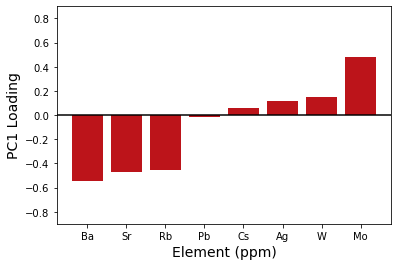

In [51]:
#PC loadings

#Set x-axis labels
bars = ('Ba', 'Sr', 'Rb', 'Pb', 'Cs', 'Ag', 'W', 'Mo')

plt.bar(bars, PC1_sorted['PC1'], linewidth=2., color='#bc141a')

plt.ylim((-0.9, 0.9))
plt.ylabel('PC1 Loading', fontsize=14)
plt.xlabel('Element (ppm)', fontsize=14)
plt.axhline(0,linestyle='-', c='black')
#plt.title("PC1 Loadings", fontsize=15)
plt.show()


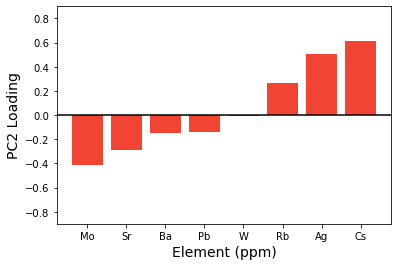

In [52]:
bars = ('Mo', 'Sr', 'Ba', 'Pb', 'W', 'Rb', 'Ag', 'Cs')

plt.bar(bars, PC2_sorted['PC2'], linewidth=2., color='#f14432')
plt.ylim((-0.9, 0.9))
plt.ylabel('PC2 Loading', fontsize=14)
plt.xlabel('Element (ppm)', fontsize=14)
plt.axhline(0,linestyle='-', c='black')
#plt.title("PC2 Loadings", fontsize=15)
plt.show()

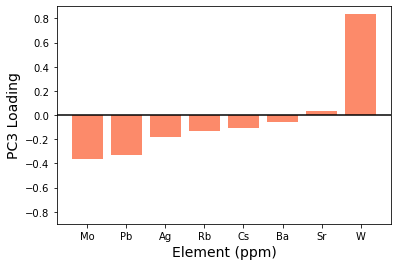

In [53]:
bars = ('Mo', 'Pb', 'Ag', 'Rb', 'Cs', 'Ba', 'Sr', 'W')

plt.bar(bars, PC3_sorted['PC3'], linewidth=2., color='#fc8a6a')
plt.ylim((-0.9, 0.9)) 
plt.ylabel('PC3 Loading', fontsize=14)
plt.xlabel('Element (ppm)', fontsize=14)
plt.axhline(0,linestyle='-', c='black')
#plt.title("PC3 Loadings", fontsize=15)
plt.show()

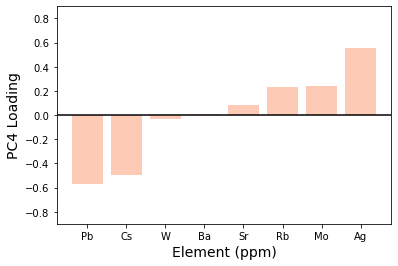

In [54]:
bars = ('Pb', 'Cs', 'W', 'Ba', 'Sr', 'Rb', 'Mo', 'Ag')

plt.bar(bars, PC4_sorted['PC4'], linewidth=2., color='#fdcab5')
plt.ylim((-0.9, 0.9))
plt.ylabel('PC4 Loading', fontsize=14)
plt.xlabel('Element (ppm)', fontsize=14)
plt.axhline(0,linestyle='-', c='black')
#plt.title("PC4 Loadings", fontsize=15)
plt.show()

## PC biplots

In [55]:
#display
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,19,11,17,25


In [56]:
print(kmeans.labels_) 

[3 0 0 0 3 3 3 0 0 0 0 2 2 2 0 2 0 0 2 2 3 1 0 0 2 0 2 0 1 3 2 3 0 3 2 2 0
 2 0 2 2 1 1 2 1 1 1 0 1 2 0 1 3 1 2 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3]


<Figure size 432x288 with 0 Axes>

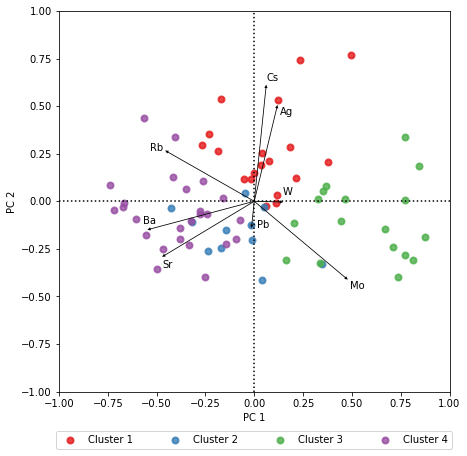

In [68]:
#PC1 vs PC2
X = X
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

#Percentage of variance explained for each component
#print('Explained variance (first five components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data (pc1 V. pc2)
plt.figure()
plt.figure(figsize=(7,7))
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
    

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.09), 
           ncol=4,
           columnspacing=3.2)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.xlim(-1,1)
plt.ylim(-1,1)

x_pos=0
y_pos=0

#Adding the PC loadings (arrows) on the biplot
Ag_Xdirect= a_T[0,0]
Ag_Ydirect= a_T[0,1]
Ba_Xdirect= a_T[1,0]
Ba_Ydirect= a_T[1,1]
Cs_Xdirect= a_T[2,0]
Cs_Ydirect= a_T[2,1]
Mo_Xdirect= a_T[3,0]
Mo_Ydirect= a_T[3,1]
Pb_Xdirect= a_T[4,0]
Pb_Ydirect= a_T[4,1]
Rb_Xdirect= a_T[5,0]
Rb_Ydirect= a_T[5,1]
Sr_Xdirect= a_T[6,0]
Sr_Ydirect= a_T[6,1]
W_Xdirect= a_T[7,0]
W_Ydirect= a_T[7,1]

#'Ag', 'Ba', 'Cs', 'Mo', 'Pb', 'Rb', 'Sr', 'W'

plt.quiver(x_pos,y_pos,Ag_Xdirect,Ag_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Ba_Xdirect,Ba_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Cs_Xdirect,Cs_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Mo_Xdirect,Mo_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Pb_Xdirect,Pb_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Rb_Xdirect,Rb_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Sr_Xdirect,Sr_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos, y_pos, W_Xdirect, W_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)

plt.text(a_T[0,0]+0.01, a_T[0,1]-0.05, 'Ag')
plt.text(a_T[1,0]-0.02, a_T[1,1]+0.03, 'Ba')
plt.text(a_T[2,0], a_T[2,1]+0.02, 'Cs')
plt.text(a_T[3,0]+0.01, a_T[3,1]-0.05, 'Mo')
plt.text(a_T[4,0]+0.03, a_T[4,1], 'Pb')
plt.text(a_T[5,0]-0.08, a_T[5,1], 'Rb')
plt.text(a_T[6,0], a_T[6,1]-0.06, 'Sr')
plt.text(a_T[7,0], a_T[7,1]+0.04, 'W')

plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')

#plt.title("First and Second Till Matrix Trace Element Principal Components", fontsize=15)

#plt.savefig('PC1_2_Malartic.pdf')
#plt.savefig('PC1_2_Malartic.png', format='png')
plt.show()



<Figure size 432x288 with 0 Axes>

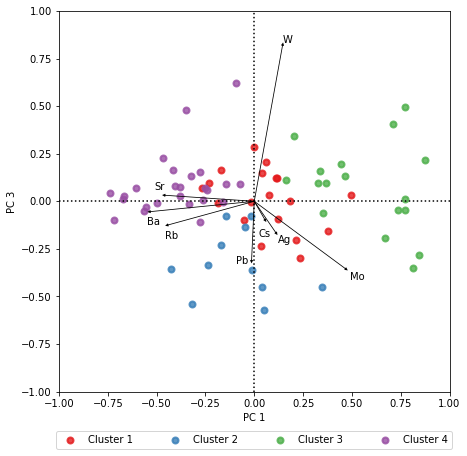

In [76]:
#PC1 vs PC3
X = X
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

#Percentage of variance explained for each component
#print('Explained variance (first five components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data (pc1 v. pc3)
plt.figure()
plt.figure(figsize=(7,7))
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 2], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.09), 
           ncol=4,
           columnspacing=3.2)

plt.xlabel('PC 1')
plt.ylabel('PC 3')
plt.xlim(-1,1)
plt.ylim(-1,1)

x_pos=0
y_pos=0

#Adding the PC loadings (arrows) on the biplot
#Adding the PC loadings (arrows) on the biplot
Ag_Xdirect= a_T[0,0]
Ag_Ydirect= a_T[0,2]
Ba_Xdirect= a_T[1,0]
Ba_Ydirect= a_T[1,2]
Cs_Xdirect= a_T[2,0]
Cs_Ydirect= a_T[2,2]
Mo_Xdirect= a_T[3,0]
Mo_Ydirect= a_T[3,2]
Pb_Xdirect= a_T[4,0]
Pb_Ydirect= a_T[4,2]
Rb_Xdirect= a_T[5,0]
Rb_Ydirect= a_T[5,2]
Sr_Xdirect= a_T[6,0]
Sr_Ydirect= a_T[6,2]
W_Xdirect= a_T[7,0]
W_Ydirect= a_T[7,2]

#'Ag', 'Ba', 'Cs', 'Mo', 'Pb', 'Rb', 'Sr', 'W'

plt.quiver(x_pos,y_pos,Ag_Xdirect,Ag_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Ba_Xdirect,Ba_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Cs_Xdirect,Cs_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Mo_Xdirect,Mo_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Pb_Xdirect,Pb_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Rb_Xdirect,Rb_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Sr_Xdirect,Sr_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos, y_pos, W_Xdirect, W_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)

plt.text(a_T[0,0], a_T[0,2]-0.04, 'Ag')
plt.text(a_T[1,0], a_T[1,2]-0.07, 'Ba')
plt.text(a_T[2,0]-0.04, a_T[2,2]-0.08, 'Cs')
plt.text(a_T[3,0]+0.01, a_T[3,2]-.05, 'Mo')
plt.text(a_T[4,0]-0.08, a_T[4,2], 'Pb')
plt.text(a_T[5,0], a_T[5,2]-0.07, 'Rb')
plt.text(a_T[6,0]-0.04, a_T[6,2]+.03, 'Sr')
plt.text(a_T[7,0], a_T[7,2], 'W')
plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')

#plt.title("First and Third Till Matrix Trace Element Principal Components", fontsize=15)

#plt.savefig('PC1_3_Malartic.pdf')
#plt.savefig('PC1_3_Malartic.png', format='png')
plt.show()


<Figure size 432x288 with 0 Axes>

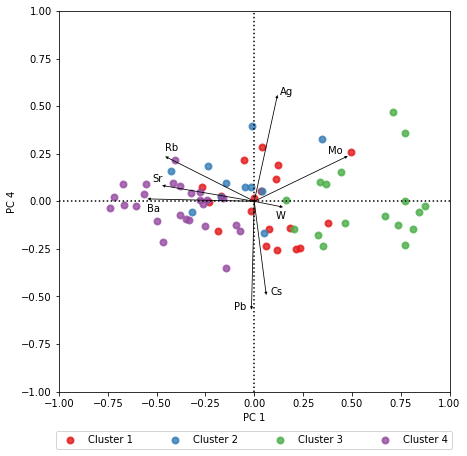

In [83]:
#PC1 vs PC4
X = X
y_num = predictions

target_names = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

#Percentage of variance explained for each component
#print('Explained variance (first five components): %s' % str(pca.explained_variance_ratio_))

#PLotting the data (pc1 v. pc4)
plt.figure()
plt.figure(figsize=(7,7))
colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']
lw=2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_r[y_num == i, 0], X_r[y_num == i, 3], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, -0.09), 
           ncol=5,
           columnspacing=3.2)


plt.xlabel('PC 1')
plt.ylabel('PC 4')
plt.xlim(-1,1)
plt.ylim(-1,1)

x_pos=0
y_pos=0

#Adding the PC loadings (arrows) on the biplot
#Adding the PC loadings (arrows) on the biplot
Ag_Xdirect= a_T[0,0]
Ag_Ydirect= a_T[0,3]
Ba_Xdirect= a_T[1,0]
Ba_Ydirect= a_T[1,3]
Cs_Xdirect= a_T[2,0]
Cs_Ydirect= a_T[2,3]
Mo_Xdirect= a_T[3,0]
Mo_Ydirect= a_T[3,3]
Pb_Xdirect= a_T[4,0]
Pb_Ydirect= a_T[4,3]
Rb_Xdirect= a_T[5,0]
Rb_Ydirect= a_T[5,3]
Sr_Xdirect= a_T[6,0]
Sr_Ydirect= a_T[6,3]
W_Xdirect= a_T[7,0]
W_Ydirect= a_T[7,3]

#'Ag', 'Ba', 'Cs', 'Mo', 'Pb', 'Rb', 'Sr', 'W'

plt.quiver(x_pos,y_pos,Ag_Xdirect,Ag_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Ba_Xdirect,Ba_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Cs_Xdirect,Cs_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Mo_Xdirect,Mo_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Pb_Xdirect,Pb_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Rb_Xdirect,Rb_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos,y_pos,Sr_Xdirect,Sr_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)
plt.quiver(x_pos, y_pos, W_Xdirect, W_Ydirect, width=0.002, headwidth=4, headlength=4, color='black', angles='xy', scale_units='xy', scale=1)

plt.text(a_T[0,0]+.01, a_T[0,3], 'Ag')
plt.text(a_T[1,0], a_T[1,3]-0.07, 'Ba')
plt.text(a_T[2,0]+.02, a_T[2,3], 'Cs')
plt.text(a_T[3,0]-0.1, a_T[3,3]+0.01, 'Mo')
plt.text(a_T[4,0]-0.09, a_T[4,3], 'Pb')
plt.text(a_T[5,0], a_T[5,3]+.03, 'Rb')
plt.text(a_T[6,0]-0.05, a_T[6,3]+0.02, 'Sr')
plt.text(a_T[7,0]-0.04, a_T[7,3]-0.06, 'W')

plt.axvline(0,linestyle=':', c='black')
plt.axhline(0, linestyle=':', c='black')

#plt.title("First and Fourth Till Matrix Trace Element Principal Components", fontsize=15)

#plt.savefig('PC1_4_Malartic.pdf')
#plt.savefig('PC1_4_Malartic.png', format='png')
plt.show()

## k-means labels for QGIS

In [60]:
#Create dataframe from kmeans labels
df2 = pd.DataFrame(kmeans.labels_)  

print(df2)

    0
0   3
1   0
2   0
3   0
4   3
.. ..
67  1
68  3
69  3
70  3
71  3

[72 rows x 1 columns]


In [63]:
#Add kmeans labels to main dataframe

df3 = pd.concat([df, df2], axis=1)

print(df3)

#Export dataframe as .csv file
#df3.to_csv(r'C:\Users\ctayl\Desktop\Malartic\Python\kmeans_trace_index2.csv') 

   Sample_ID   Oxidation       X        Y  Year     Type  Depth_m  \
0       001a      Slight  712587  5331728  2016  Surface     0.35   
1       004a      Slight  706551  5333381  2016  Surface     0.10   
2       005a      Slight  706274  5325153  2016  Surface     0.30   
3       007a      Slight  716966  5323165  2016  Surface     0.40   
4       009a      Slight  718028  5338822  2016  Surface     0.20   
..       ...         ...     ...      ...   ...      ...      ...   
67      SS 5      Slight  708031  5332341  2015  Surface     0.54   
68      SS 6      Slight  712580  5331733  2015  Surface     0.36   
69      SS 7      Slight  710245  5335036  2015  Surface     0.40   
70      SS 8      Slight  709807  5333816  2015  Surface     0.30   
71      SS 9  Unapparent  711255  5332859  2015  Surface     0.51   

   Grain_size_group  Distance_to_pit_m Underlying Bedrock  ... PbSUM_ppm  \
0            Medium        2725.103005   Meta-sedimentary  ...     10.20   
1            Medium

In [62]:
#display
countscldf

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
0,19,11,17,25
